In [17]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass


In [7]:
def OrbitCOM(galaxy, start, end, n):
    #function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    #inputs:
    #    galaxy: the name of the galaxy, e.g. “MW”
    #    start: number of the first snapshot to be read in
    #    end: last snapshot to be read in
    #    n: n an integer indicating the intervals over which you will return the COM     
    #returns: 
    #   fileout: compute the time and COM position and velocity vectors of a given galaxy in each snapshot and save that output into a file
    
    # compose the filename for output
    fileout = 'Orbit_'+galaxy+'.txt'
    
    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    # for M33 that is stripped more, use different values for VolDec
    if 'M33' == galaxy:
        delta = 0.1
        VolDec = 4
    else:
        delta = 0.1
        VolDec = 2
    
    # generate the snapshot id sequence 
    # it is always a good idea to also check if the input is eligible (not required)
    temp_snap_id = np.arange(start,end+1,n)

    
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros([temp_snap_id.size, 7])
    
    # a for loop 
    # loop over files
    for i, snap_id in enumerate(temp_snap_id):
        
        # compose the data filename (be careful about the folder)
        ilbl = '000' + str(snap_id)
        ilbl = ilbl[-3:]
        filename= '%s_'%(galaxy) + ilbl + '.txt'
        # Initialize an instance of CenterOfMass class, using disk particles
        COMGalaxy = CenterOfMass(filename,2)
        # Store the COM pos and vel. Remember that now COM_P required VolDec
        COMGalaxy_P = COMGalaxy.COM_P(delta, VolDec)
        COMGalaxy_V = COMGalaxy.COM_V(COMGalaxy_P[0],COMGalaxy_P[1],COMGalaxy_P[2])
        # store the time, pos, vel in ith element of the orbit array,  without units (.value) 
        # note that you can store 
        # a[i] = var1, *tuple(array1)
        orbit[i] = (COMGalaxy.time.value)/1000, COMGalaxy_P[0].value, COMGalaxy_P[1].value,COMGalaxy_P[2].value,\
        COMGalaxy_V[0].value,COMGalaxy_V[1].value,COMGalaxy_V[2].value
        
        # print snap_id to see the progress
        #print(snap_id)
        
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))

In [8]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first! 
OrbitCOM('MW',0,800,5)
OrbitCOM('M31',0,800,5)
OrbitCOM('M33',0,800,5)

In [13]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt
MW_data = np.genfromtxt('Orbit_MW.txt',dtype=None,names=True)
M31_data = np.genfromtxt('Orbit_M31.txt',dtype=None,names=True)
M33_data = np.genfromtxt('Orbit_M33.txt',dtype=None,names=True)

In [14]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  
def Vector_diff(data1,data2):
    # Input:
    #     data1: input galaxy data1
    #     data2: input galaxy data2
    # Return:
    #     return the magnitude position difference and velocity difference
    x1 = data1['x']
    y1 = data1['y']
    z1 = data1['z']
    x2 = data2['x']
    y2 = data2['y']
    z2 = data2['z']
    
    vx1 = data1['vx']
    vy1 = data1['vy']
    vz1 = data1['vz']
    vx2 = data2['vx']
    vy2 = data2['vy']
    vz2 = data2['vz']
    return np.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2),np.sqrt((vx1-vx2)**2+(vy1-vy2)**2+(vz1-vz2)**2) 

In [15]:
# Determine the magnitude of the relative position and velocities 

# of MW and M31
Pos_MW_M31, Vel_MW_M31 = Vector_diff(MW_data,M31_data)
# of M33 and M31
Pos_M31_M33, Vel_M31_M33 = Vector_diff(M31_data,M33_data)

Text(0.5, 1.0, '$Separation$ $Position$')

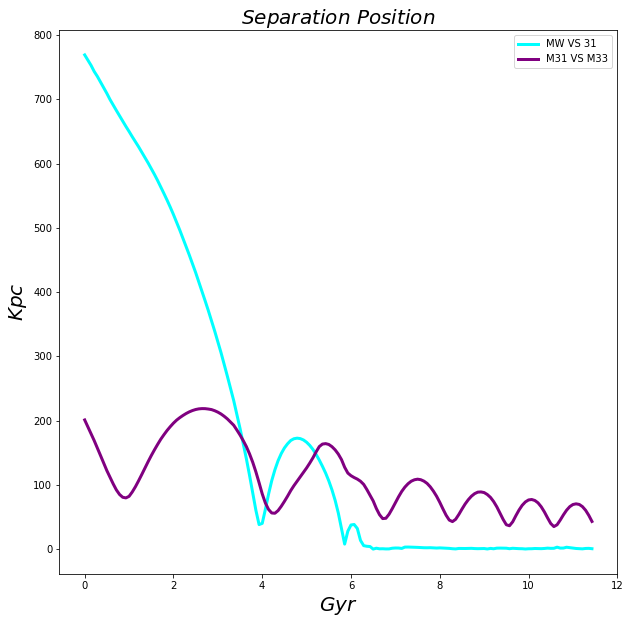

In [24]:
# Plot the Orbit of the galaxies 
#################################
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
plt.plot(MW_data['t'], Pos_MW_M31, linewidth=3, color = 'cyan', label = 'MW VS 31')
plt.plot(M31_data['t'], Pos_M31_M33, linewidth=3, color = 'purple', label = 'M31 VS M33')
plt.xlabel('$Gyr$',fontsize=20)
plt.ylabel('$Kpc$',fontsize=20)
legend = ax.legend()
plt.title('$Separation$ $Position$',fontsize=20)

Text(0.5, 1.0, '$Relative$ $Velocity$')

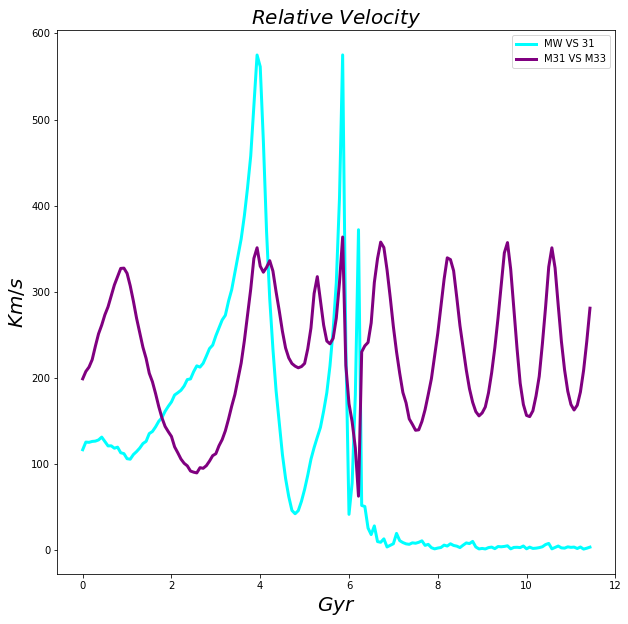

In [25]:
# Plot the orbital velocities of the galaxies 
#################################
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
plt.plot(MW_data['t'], Vel_MW_M31, linewidth=3, color = 'cyan', label = 'MW VS 31')
plt.plot(M31_data['t'], Vel_M31_M33, linewidth=3, color = 'purple', label = 'M31 VS M33')
plt.xlabel('$Gyr$',fontsize=20)
plt.ylabel('$Km/s$',fontsize=20)
legend = ax.legend()
plt.title('$Relative$ $Velocity$',fontsize=20)

# 4

# Q1
In figure 1, three encounters, one around 4 Gyr and two arond 6 Gyr.

# Q2
When  encounters the relative velocity is higher around 600km/s, after that the velocity will drop quickly to 100km/s.

# Q3

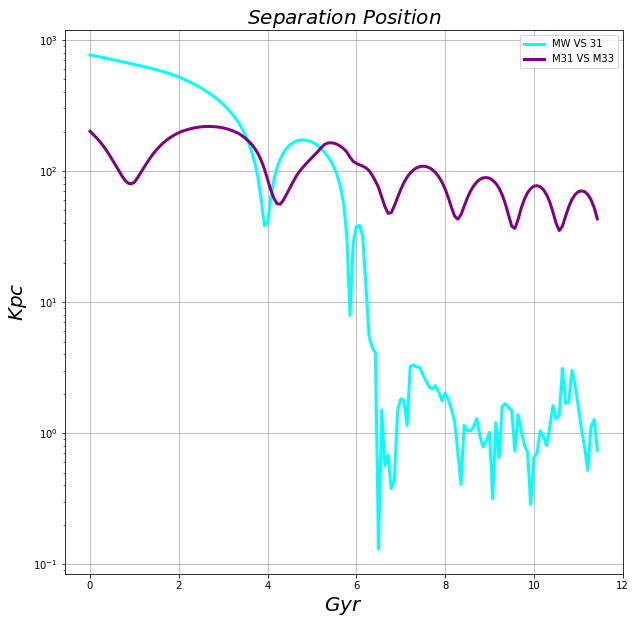

In [34]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
plt.semilogy(MW_data['t'], Pos_MW_M31, linewidth=3, color = 'cyan', label = 'MW VS 31')
plt.semilogy(M31_data['t'], Pos_M31_M33, linewidth=3, color = 'purple', label = 'M31 VS M33')
plt.xlabel('$Gyr$',fontsize=20)
plt.ylabel('$Kpc$',fontsize=20)
legend = ax.legend()
plt.title('$Separation$ $Position$',fontsize=20)
ax.grid(True)

the time is near 6.5 Gyr.

# Q4

In [35]:
len(Pos_M31_M33)

161

In [39]:
Pos_M31_M33[100:150]

array([ 89.84818418,  96.57164905, 101.87038137, 105.74127293,
       107.98852948, 108.90063407, 108.11782092, 105.87102484,
       102.35592411,  97.02459946,  90.27292894,  82.29463834,
        72.92387401,  62.68428511,  52.8143437 ,  45.26957256,
        42.89399725,  46.42928063,  53.95607565,  62.32296607,
        70.23787369,  76.99647849,  82.45968227,  86.43934636,
        88.74713855,  89.07070506,  88.06212523,  85.05582755,
        80.5476089 ,  74.06050027,  65.80895228,  56.16190969,
        46.14406787,  37.98356223,  36.47438279,  42.5520258 ,
        52.03522461,  60.94684077,  68.25311861,  73.52251764,
        76.60014948,  77.29775482,  75.74745936,  72.07691725,
        65.94401489,  58.016377  ,  48.68140816,  39.97195142,
        35.15931313,  37.95347415])

In [41]:
108.9-89.07

19.830000000000013

In [44]:
np.where(np.around(Pos_M31_M33)==109)

(array([ 86, 105]),)

In [45]:
np.where(np.around(Pos_M31_M33)==89)

(array([ 15, 124, 125]),)

In [47]:
M33_data['t'][105]

7.5

In [48]:
M33_data['t'][125]

8.929

In [51]:
rate = (19.83)/(8.929-7.5)
rate

13.876836948915322

In [52]:
mergetime = 75/13.876836948915322
mergetime

5.4046898638426635

So, the merge time need 5.4 Gyr